## Support Vector Machine

#### Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Importing the dataset

In [ ]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

#### Splitting the training and test data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

### Training the SVM model on the training set

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear',random_state = 0)
svclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predicting the test set result

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[66  2]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



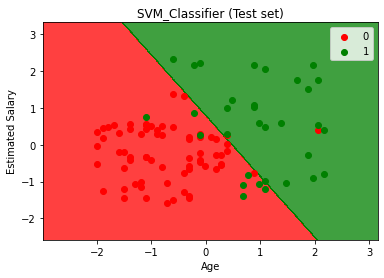

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
#X_set, y_set = sc_x.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1,
                               stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, svclassifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)

plt.title('SVM_Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()